In [8]:
import os
import struct
from array import array as pyarray
from pylab import *
from numpy import *
from numpy import array, int8, uint8, zeros
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
import warnings
import itertools

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import linear_model

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

# Utilities

In [2]:
def load_mnist(dataset="training", digits=np.arange(10), path="/home/lmelvix/projects/mnist/data/"):
    '''
    Load Binary MNIST dataset images and corresponding labels
    :param dataset: Type of dataset to be loaded
    :param digits:  Range of digits to be stored
    :param path:  Path to MNIST dataset
    :return: Images and corresponding labels
    '''
    if dataset == "training":
        fname_img = os.path.join(path, 'train-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels.idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images.idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels.idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)
    images = zeros((N, rows * cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)

    for i in range(len(ind)):
            images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ])
            labels[i] = lbl[ind[i]]

    return images, labels


In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Load Dataset

In [4]:
train_images, train_labels = load_mnist('training', digits=[1,2,3,4,5,6,7,8,9,0])
test_images, test_labels = load_mnist('testing', digits=[1,2,3,4,5,6,7,8,9,0])

# Nearest Neighbour Classification

Confusion matrix, without normalization
[[ 973    1    1    0    0    1    3    1    0    0]
 [   0 1129    3    0    1    1    1    0    0    0]
 [   7    6  992    5    1    0    2   16    3    0]
 [   0    1    2  970    1   19    0    7    7    3]
 [   0    7    0    0  944    0    3    5    1   22]
 [   1    1    0   12    2  860    5    1    6    4]
 [   4    2    0    0    3    5  944    0    0    0]
 [   0   14    6    2    4    0    0  992    0   10]
 [   6    1    3   14    5   13    3    4  920    5]
 [   2    5    1    6   10    5    1   11    1  967]]


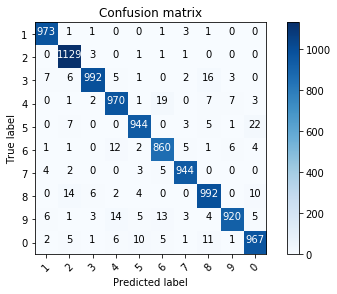

In [5]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(train_images, train_labels.ravel())
predict = neigh.predict(test_images)
cnf_matrix = confusion_matrix(test_labels, predict)
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5,6,7,8,9,0], title='Confusion matrix')

In [7]:
print(classification_report(test_labels, predict, target_names=['1','2','3','4','5','6','7','8','9','0']))
print accuracy_score(test_labels, predict)

             precision    recall  f1-score   support

          1       0.98      0.99      0.99       980
          2       0.97      0.99      0.98      1135
          3       0.98      0.96      0.97      1032
          4       0.96      0.96      0.96      1010
          5       0.97      0.96      0.97       982
          6       0.95      0.96      0.96       892
          7       0.98      0.99      0.98       958
          8       0.96      0.96      0.96      1028
          9       0.98      0.94      0.96       974
          0       0.96      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000



# Support Vector Machines

Confusion matrix, without normalization
[[ 895    0   10    6    0    8   19    4   37    1]
 [   0 1074    7    0    0    1    2    1   49    1]
 [   4    4  899    6    5    1    8   15   87    3]
 [   4    4   36  850    0    2    0   16   94    4]
 [   1    1   13    9  785    0    4   28   84   57]
 [   7    3    9   63    5  509   11   18  256   11]
 [   8    1   14    1    3    8  878    2   43    0]
 [   0   10   23    1    0    0    1  967   12   14]
 [   2    5    8    9    5    4    3   22  914    2]
 [   5    8    2   13    6    2    0  124   80  769]]


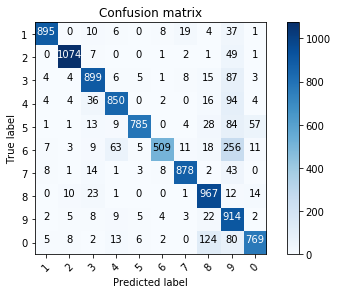

In [11]:
clf = linear_model.SGDClassifier()
clf.fit(train_images, train_labels.ravel())
predict = clf.predict(test_images)
cnf_matrix = confusion_matrix(test_labels, predict)
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5,6,7,8,9,0], title='Confusion matrix')

In [12]:
print(classification_report(test_labels, predict, target_names=['1','2','3','4','5','6','7','8','9','0']))
print accuracy_score(test_labels, predict)

             precision    recall  f1-score   support

          1       0.97      0.91      0.94       980
          2       0.97      0.95      0.96      1135
          3       0.88      0.87      0.88      1032
          4       0.89      0.84      0.86      1010
          5       0.97      0.80      0.88       982
          6       0.95      0.57      0.71       892
          7       0.95      0.92      0.93       958
          8       0.81      0.94      0.87      1028
          9       0.55      0.94      0.70       974
          0       0.89      0.76      0.82      1009

avg / total       0.88      0.85      0.86     10000

0.854


# Convolutional Neural Networks 

In [13]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [14]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [15]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [16]:
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [18]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())

for i in range(2500):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})


step 0, training accuracy 0.08
step 100, training accuracy 0.82
step 200, training accuracy 0.92
step 300, training accuracy 0.92
step 400, training accuracy 0.94
step 500, training accuracy 0.92
step 600, training accuracy 0.92
step 700, training accuracy 0.92
step 800, training accuracy 0.92
step 900, training accuracy 1
step 1000, training accuracy 1
step 1100, training accuracy 0.98
step 1200, training accuracy 0.98
step 1300, training accuracy 0.98
step 1400, training accuracy 0.96
step 1500, training accuracy 0.94
step 1600, training accuracy 1
step 1700, training accuracy 0.98
step 1800, training accuracy 0.96
step 1900, training accuracy 1
step 2000, training accuracy 0.92
step 2100, training accuracy 0.96
step 2200, training accuracy 0.98
step 2300, training accuracy 0.96
step 2400, training accuracy 1


In [22]:
print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

test accuracy 0.979


In [23]:
print x.shape

(?, 784)
